![](task3.png)

## Task 03 Advance Level

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
from matplotlib import pyplot as plt

### Loading dataset from keras

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
x_train[0].shape

(28, 28)

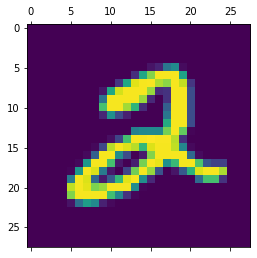

In [6]:
plt.matshow(x_train[5]);

In [7]:
y_train[5]

2

### Scaling data 

In [8]:
x_train = x_train/255
x_test = x_test/255

### Reshape the data

In [9]:
xtrain = x_train.reshape(len(x_train),28*28)
xtest = x_test.reshape(len(x_test),28*28)
xtrain.shape,xtest.shape

((60000, 784), (10000, 784))

### Model Building

In [29]:
model = keras.Sequential([
    keras.layers.Dense(50,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(xtrain,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3248 - accuracy: 0.9081
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1669 - accuracy: 0.9513
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1254 - accuracy: 0.9631
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1015 - accuracy: 0.9700
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0849 - accuracy: 0.9744


### Evaluation and Prediction

In [30]:
model.evaluate(xtest,y_test)[1]

313/313 [==============================] - 0s 1ms/step - loss: 0.0999 - accuracy: 0.9715


0.9714999794960022

In [31]:
y_pred = model.predict(xtest)
y_pred[1]

array([4.8992005e-01, 9.9491817e-01, 9.9999225e-01, 9.7311974e-01,
       8.3628244e-08, 2.8242442e-01, 4.4958186e-01, 5.7103006e-07,
       3.7172493e-01, 9.3626016e-07], dtype=float32)

In [32]:
y_pred = [np.argmax(i) for i in y_pred]

In [33]:
y_pred[0:5]

[7, 2, 1, 0, 4]

In [34]:
y_test[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

### Visualizing Model by Confusion Matrix

In [35]:
import tensorflow as tf
import seaborn as sns

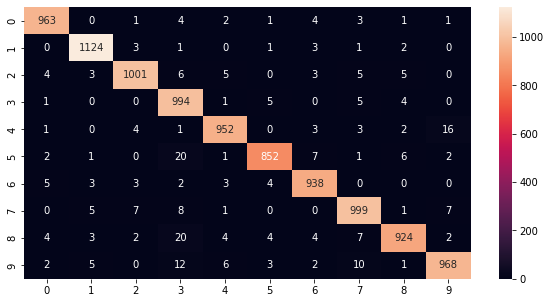

In [36]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True,fmt='d');